## 데이터 수집 및 정제

In [1]:
import pandas as pd
import numpy as np
child_h = pd.read_csv('어린이보호구역현황(개방표준).csv', encoding ='CP949')
cctv = pd.read_csv('CCTV현황(개방표준).csv', encoding ='CP949')
walk_child = pd.read_csv('보행어린이사고다발지현황.csv', encoding ='CP949')
kindergarden = pd.read_csv('어린이집및유치원현황.csv', encoding ='CP949')
elementery = pd.read_csv('초등학교현황.csv', encoding ='CP949')

### 0~13세 아이 동별 실거주자 인구 수 데이터 정제

In [2]:
child_population = pd.read_excel('연령별 인구 데이터 수정.xlsx', index_col=0, thousands=',')
child_population.head()

,시흥시,대야동,신천동,신현동,은행동,매화동,목감동,군자동,월곶동,정왕본동,정왕1동,정왕2동,정왕3동,정왕4동,배곧동,과림동,연성동,장곡동,능곡동
합 계,510098,44784,36284,9961,55843,12130,42276,22041,16016,20309,22544,32129,22937,21351,71201,1977,23855,31092,23368
0세,3423,314,113,38,498,33,425,69,90,91,85,146,121,115,713,4,122,234,212
1세,3946,355,114,32,585,49,514,108,112,106,97,163,116,119,867,5,142,255,207
2세,4380,341,118,41,670,46,567,119,109,105,100,201,163,113,958,6,163,317,243
3세,4709,383,116,41,799,59,544,125,136,112,117,212,136,165,1045,4,163,319,233


In [3]:
child_population = child_population.T.astype(int)
child_population = child_population.iloc[:, [i for i in range(1, 15)]]
child_population['합계'] = child_population.iloc[:].sum(axis=1)
child_population

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,합계
시흥시,3423,3946,4380,4709,5179,5581,5618,5169,5616,5498,5398,5013,5160,5329,70019
대야동,314,355,341,383,350,415,357,338,317,327,323,281,322,370,4793
신천동,113,114,118,116,169,164,187,181,222,219,255,239,262,294,2653
신현동,38,32,41,41,41,54,35,44,48,63,67,62,73,74,713
은행동,498,585,670,799,864,912,847,726,730,699,659,583,612,595,9779
매화동,33,49,46,59,64,81,71,88,80,95,108,101,113,102,1090
목감동,425,514,567,544,676,657,733,576,580,571,484,403,360,375,7465
군자동,69,108,119,125,139,190,188,153,205,235,204,232,198,238,2403
월곶동,90,112,109,136,137,133,158,141,175,185,173,167,146,173,2035
정왕본동,91,106,105,112,109,138,107,108,138,127,110,117,117,123,1608


### 어린이 보호구역, cctv 행정동 기준 댓수 데이터프레임 생성

In [4]:
# 법정동-> 행정동 변환 함수
def change_region(region):
    if region == '대야동' or region == '계수동':
        return '대야동'
    elif region == '신천동':
        return '신천동'
    elif region == '방산동' or region == '포동' or region == '미산동':
        return '신현동'
    elif region == '은행동' or region == '안현동':
        return '은행동'
    elif region == '매화동' or region == '도창동' or region == '금이동':
        return '매화동'
    elif region == '물왕동' or region == '산현동' or region == '조남동' or region == '논곡동' or region == '목감동':
        return '목감동'
    elif region == '거모동' or region == '군자동':
        return '군자동'
    elif region == '월곶동':
        return '월곶동'
    elif region == '정왕동' or region == '죽율동':
        return '정왕본동'
    elif region == '정왕1동':
        return '정왕1동'
    elif region == '정왕2동':
        return '정왕2동'
    elif region == '정왕3동':
        return '정왕3동'
    elif region == '정왕4동':
        return '정왕4동'
    elif region == '과림동' or region == '무지내동':
        return '과림동'
    elif region == '하중동' or region =='하상동' or region == '광석동' or region == '장현동':
        return '연성동'
    elif region == '장곡동':
        return '장곡동'
    elif region == '화정동' or region == '능곡동' or region == '광석동' or region == '군자동':
        return '능곡동'
    elif region == '배곧동':
        return '배곧동'

In [5]:
# 어린이보호구역
child_h

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,어린이집,시립정왕어린이집,경기도 시흥시 정왕대로53번길 38,경기도 시흥시 정왕동 1866-1번지,37.357610,126.726442,경기도 시흥시청,시흥경찰서,Y,1.0,8,2020-12-02
1,어린이집,또래또래어린이집,경기도 시흥시 마유로443번길 33,경기도 시흥시 정왕동 2293-7번지,37.354127,126.738627,경기도 시흥시청,시흥경찰서,Y,3.0,4,2020-12-02
2,어린이집,큰숲어린이집,경기도 시흥시 오이도중앙로 24-10,경기도 시흥시 정왕동 1998-7번지,37.346481,126.689175,경기도 시흥시청,시흥경찰서,Y,1.0,6,2020-12-02
3,어린이집,시립정왕본동어린이집,경기도 시흥시 오동마을로6번안길 17,경기도 시흥시 정왕동 2318-6번지,37.352229,126.744044,경기도 시흥시청,시흥경찰서,Y,2.0,6,2020-12-02
4,어린이집,에트라움어린이집,경기도 시흥시 오동마을로5번길 37,경기도 시흥시 정왕동 2315-13번지,37.352406,126.746119,경기도 시흥시청,시흥경찰서,Y,3.0,6,2020-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...
121,초등학교,배곧누리초등학교,경기도 시흥시 해송십리로 472-30,경기도 시흥시 정왕동 2384번지,37.382794,126.732093,경기도 시흥시청,시흥경찰서,N,0.0,20,2020-12-02
122,초등학교,시흥가온초등학교,경기도 시흥시 장현능곡로 33,경기도 시흥시 장현동 428-1번지,37.373179,126.793955,경기도 시흥시청,시흥경찰서,Y,1.0,18,2020-12-02
123,어린이집,세종어린이집,경기도 시흥시 군자로481번길 13,경기도 시흥시 거모동 1718-6번지,37.347950,126.784880,경기도 시흥시청,시흥경찰서,N,0.0,7,2020-12-02
124,어린이집,아라어린이집,경기도 시흥시 오동마을로45번길 27,경기도 시흥시 정왕동 2314-34,37.353832,126.747408,경기도 시흥시청,시흥경찰서,N,0.0,7,2020-12-02


In [6]:
'''
1. 소재지지번주소에서 법정동 이름 추출
2. 법정동->행정동 변환
3. 행정동 기준 보호구역 수 산출
'''
child_h_law_location = child_h['소재지지번주소'].str.split(' ')
child_h['소재지법정동'] = child_h_law_location.str.get(2)
child_h['소재지행정동'] = child_h['소재지법정동'].apply(change_region)
child_h

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자,소재지법정동,소재지행정동
0,어린이집,시립정왕어린이집,경기도 시흥시 정왕대로53번길 38,경기도 시흥시 정왕동 1866-1번지,37.357610,126.726442,경기도 시흥시청,시흥경찰서,Y,1.0,8,2020-12-02,정왕동,정왕본동
1,어린이집,또래또래어린이집,경기도 시흥시 마유로443번길 33,경기도 시흥시 정왕동 2293-7번지,37.354127,126.738627,경기도 시흥시청,시흥경찰서,Y,3.0,4,2020-12-02,정왕동,정왕본동
2,어린이집,큰숲어린이집,경기도 시흥시 오이도중앙로 24-10,경기도 시흥시 정왕동 1998-7번지,37.346481,126.689175,경기도 시흥시청,시흥경찰서,Y,1.0,6,2020-12-02,정왕동,정왕본동
3,어린이집,시립정왕본동어린이집,경기도 시흥시 오동마을로6번안길 17,경기도 시흥시 정왕동 2318-6번지,37.352229,126.744044,경기도 시흥시청,시흥경찰서,Y,2.0,6,2020-12-02,정왕동,정왕본동
4,어린이집,에트라움어린이집,경기도 시흥시 오동마을로5번길 37,경기도 시흥시 정왕동 2315-13번지,37.352406,126.746119,경기도 시흥시청,시흥경찰서,Y,3.0,6,2020-12-02,정왕동,정왕본동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,초등학교,배곧누리초등학교,경기도 시흥시 해송십리로 472-30,경기도 시흥시 정왕동 2384번지,37.382794,126.732093,경기도 시흥시청,시흥경찰서,N,0.0,20,2020-12-02,정왕동,정왕본동
122,초등학교,시흥가온초등학교,경기도 시흥시 장현능곡로 33,경기도 시흥시 장현동 428-1번지,37.373179,126.793955,경기도 시흥시청,시흥경찰서,Y,1.0,18,2020-12-02,장현동,연성동
123,어린이집,세종어린이집,경기도 시흥시 군자로481번길 13,경기도 시흥시 거모동 1718-6번지,37.347950,126.784880,경기도 시흥시청,시흥경찰서,N,0.0,7,2020-12-02,거모동,군자동
124,어린이집,아라어린이집,경기도 시흥시 오동마을로45번길 27,경기도 시흥시 정왕동 2314-34,37.353832,126.747408,경기도 시흥시청,시흥경찰서,N,0.0,7,2020-12-02,정왕동,정왕본동


In [7]:
cctv

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,경기도 시흥시청,경기도 시흥시 수인로2421번길 26,경기도 시흥시 논곡동 227-2,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.392609,126.855264,2017-01-01
1,경기도 시흥시청,경기도 시흥시 봉우순환로 117-7,경기도 시흥시 정왕본동 2245-3,어린이보호,1,130,360도 전방면,30.0,2017-03,031-310-3702,37.357223,126.751885,2017-01-01
2,경기도 시흥시청,경기도 시흥시 수인로2793번길 6,경기도 시흥시 도창동 118,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.406720,126.823792,2017-01-01
3,경기도 시흥시청,NaN,경기도 시흥시 도창동 98-4,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.409971,126.822294,2017-01-01
4,경기도 시흥시청,경기도 시흥시 매화1로 62,경기도 시흥시 매화동 303-1,어린이보호,1,130,360도 전방면,30.0,2017-03,031-310-3702,37.416184,126.808463,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,경기도 시흥시청,경기도 시흥시 시청로68번길 4,경기도 시흥시 장현동 541-1,생활방범,1,200,360도 전방면,30.0,2017-04,031-310-3702,37.380301,126.800359,2017-01-01
780,경기도 시흥시청,경기도 시흥시 신현로202번길 31,경기도 시흥시 포동 20-17,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.405052,126.770915,2017-01-01
781,경기도 시흥시청,경기도 시흥시 군서로36번길 23,경기도 시흥시 정왕본동 1187-1,생활방범,1,200,360도 전방면,30.0,2017-04,031-310-3702,37.347172,126.749255,2017-01-01
782,경기도 시흥시청,경기도 시흥시 능곡로 78,경기도 시흥시 화정동 651-6,생활방범,3,200,360도 전방면,30.0,2017-03,031-310-3702,37.361415,126.815965,2017-01-01


In [8]:
'''
1. 소재지지번주소에서 법정동 이름 추출
2. 법정동->행정동 변환
3. 행정동 기준 cctv 수 산출
'''
cctv_law_location = cctv['소재지지번주소'].str.split(' ')
cctv['소재지법정동'] = cctv_law_location.str.get(2)
cctv['소재지행정동'] = cctv['소재지법정동'].apply(change_region)

# 결측치 제거
cctv.fillna('정왕본동', inplace=True)
# 대야동332, 정왕동2345
cctv.iloc[431, 14] = '대야동'
cctv.iloc[717, 14] = '대야동'
cctv

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,소재지법정동,소재지행정동
0,경기도 시흥시청,경기도 시흥시 수인로2421번길 26,경기도 시흥시 논곡동 227-2,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.392609,126.855264,2017-01-01,논곡동,목감동
1,경기도 시흥시청,경기도 시흥시 봉우순환로 117-7,경기도 시흥시 정왕본동 2245-3,어린이보호,1,130,360도 전방면,30.0,2017-03,031-310-3702,37.357223,126.751885,2017-01-01,정왕본동,정왕본동
2,경기도 시흥시청,경기도 시흥시 수인로2793번길 6,경기도 시흥시 도창동 118,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.406720,126.823792,2017-01-01,도창동,매화동
3,경기도 시흥시청,정왕본동,경기도 시흥시 도창동 98-4,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.409971,126.822294,2017-01-01,도창동,매화동
4,경기도 시흥시청,경기도 시흥시 매화1로 62,경기도 시흥시 매화동 303-1,어린이보호,1,130,360도 전방면,30.0,2017-03,031-310-3702,37.416184,126.808463,2017-01-01,매화동,매화동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,경기도 시흥시청,경기도 시흥시 시청로68번길 4,경기도 시흥시 장현동 541-1,생활방범,1,200,360도 전방면,30.0,2017-04,031-310-3702,37.380301,126.800359,2017-01-01,장현동,연성동
780,경기도 시흥시청,경기도 시흥시 신현로202번길 31,경기도 시흥시 포동 20-17,어린이보호,1,200,360도 전방면,30.0,2017-03,031-310-3702,37.405052,126.770915,2017-01-01,포동,신현동
781,경기도 시흥시청,경기도 시흥시 군서로36번길 23,경기도 시흥시 정왕본동 1187-1,생활방범,1,200,360도 전방면,30.0,2017-04,031-310-3702,37.347172,126.749255,2017-01-01,정왕본동,정왕본동
782,경기도 시흥시청,경기도 시흥시 능곡로 78,경기도 시흥시 화정동 651-6,생활방범,3,200,360도 전방면,30.0,2017-03,031-310-3702,37.361415,126.815965,2017-01-01,화정동,능곡동


### 0~13세 어린이 실 거주 지역 인구 수 대비 cctv, 보호구역 수 비율

In [9]:
# 행정동 별 어린이 보호구역 수
child_h_num = child_h.groupby('소재지행정동').size()

# 행정동 별 cctv 대수
cctv_num = cctv.groupby('소재지행정동').size()

# 각 시리즈 & 어린이 인구 수 데이터프레임 합성
all_num_df = pd.concat([child_h_num, cctv_num], axis=1)
final_child_population = pd.concat([child_population, all_num_df], axis=1)

# 열 이름 변경
final_child_population.rename(columns={0:'어린이 보호구역 수', 1:'CCTV 수'}, inplace=True)

# 결측치 변환
final_child_population.fillna(0, inplace=True)

# 어린이 보호구역 수, CCTV 수 시흥시 전체 합계
final_child_population.loc['시흥시', '어린이 보호구역 수'] = final_child_population['어린이 보호구역 수'].sum()
final_child_population.loc['시흥시', 'CCTV 수'] = final_child_population['CCTV 수'].sum()

# 합계 / 각 열 수 => 측정 비율 레이블 컬럼 각각 하나씩 산출
# 비율 단위는 %
final_child_population['어린이 보호구역 수 비율'] = (final_child_population['어린이 보호구역 수'] / final_child_population['합계']) * 100
final_child_population['CCTV 수 비율'] = (final_child_population['CCTV 수'] / final_child_population['합계']) * 100

final_child_population

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,11세,12세,13세,합계,어린이 보호구역 수,CCTV 수,어린이 보호구역 수 비율,CCTV 수 비율
시흥시,3423,3946,4380,4709,5179,5581,5618,5169,5616,5498,5398,5013,5160,5329,70019,126.0,784.0,0.179951,1.119696
대야동,314,355,341,383,350,415,357,338,317,327,323,281,322,370,4793,10.0,84.0,0.208638,1.752556
신천동,113,114,118,116,169,164,187,181,222,219,255,239,262,294,2653,10.0,98.0,0.376932,3.693931
신현동,38,32,41,41,41,54,35,44,48,63,67,62,73,74,713,4.0,40.0,0.561010,5.610098
은행동,498,585,670,799,864,912,847,726,730,699,659,583,612,595,9779,12.0,45.0,0.122712,0.460170
매화동,33,49,46,59,64,81,71,88,80,95,108,101,113,102,1090,6.0,38.0,0.550459,3.486239
목감동,425,514,567,544,676,657,733,576,580,571,484,403,360,375,7465,8.0,29.0,0.107167,0.388480
군자동,69,108,119,125,139,190,188,153,205,235,204,232,198,238,2403,10.0,63.0,0.416146,2.621723
월곶동,90,112,109,136,137,133,158,141,175,185,173,167,146,173,2035,5.0,14.0,0.245700,0.687961
정왕본동,91,106,105,112,109,138,107,108,138,127,110,117,117,123,1608,43.0,141.0,2.674129,8.768657


### 어린이 사고 다발지역과 비교

In [10]:
walk_child['행정동'] = walk_child['구/읍면동명'].apply(change_region)
walk_child_accident_num_df = walk_child[['행정동', '발생건수']]
walk_child_accident_num_df = walk_child_accident_num_df.groupby(by=['행정동'], as_index=False).sum()
walk_child_accident_num_df.set_index('행정동', inplace=True)

# # 어린이 실거주 지역 비율, 사고다발지 비교 최종 데이터
real_child_acc_df = pd.concat([final_child_population, walk_child_accident_num_df], axis=1)
real_child_acc_df.fillna(0, inplace=True)
real_child_acc_df.rename(columns={'발생건수':'사고발생건수'}, inplace=True)
real_child_acc_df.loc['시흥시', '사고발생건수'] = real_child_acc_df['사고발생건수'].sum()

# cctv, 어린이 보호구역 수 비율 합산 컬럼
real_child_acc_df['합산비율'] = real_child_acc_df['어린이 보호구역 수 비율'] + real_child_acc_df['CCTV 수 비율']

# 사고다발지역만 분석하기 위해 사고발생건수가 없는 지역은 삭제
no_acc_num = real_child_acc_df[real_child_acc_df['사고발생건수'] == 0].index
real_child_acc_df = real_child_acc_df.drop(no_acc_num)
real_child_acc_df.drop(['시흥시'], inplace=True)

real_child_acc_df.rename(columns={'합계':'인구합계'}, inplace=True)
real_child_acc_df
# real_child_acc_df.to_csv('실거주 어린이 수 가공 데이터.csv', encoding='cp949')

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,11세,12세,13세,인구합계,어린이 보호구역 수,CCTV 수,어린이 보호구역 수 비율,CCTV 수 비율,사고발생건수,합산비율
대야동,314,355,341,383,350,415,357,338,317,327,...,281,322,370,4793,10.0,84.0,0.208638,1.752556,7.0,1.961193
신천동,113,114,118,116,169,164,187,181,222,219,...,239,262,294,2653,10.0,98.0,0.376932,3.693931,9.0,4.070863
군자동,69,108,119,125,139,190,188,153,205,235,...,232,198,238,2403,10.0,63.0,0.416146,2.621723,18.0,3.037869
월곶동,90,112,109,136,137,133,158,141,175,185,...,167,146,173,2035,5.0,14.0,0.245700,0.687961,4.0,0.933661
정왕본동,91,106,105,112,109,138,107,108,138,127,...,117,117,123,1608,43.0,141.0,2.674129,8.768657,6.0,11.442786
장곡동,234,255,317,319,366,398,455,421,447,469,...,399,437,430,5435,5.0,13.0,0.091996,0.239190,3.0,0.331187


In [11]:
real_child_acc_df['사고발생건수'].describe()

count     6.000000
mean      7.833333
std       5.419102
min       3.000000
25%       4.500000
50%       6.500000
75%       8.500000
max      18.000000
Name: 사고발생건수, dtype: float64

In [12]:
real_child_acc_df['합산비율'].describe()

count     6.000000
mean      3.629593
std       4.062559
min       0.331187
25%       1.190544
50%       2.499531
75%       3.812615
max      11.442786
Name: 합산비율, dtype: float64

<AxesSubplot:>

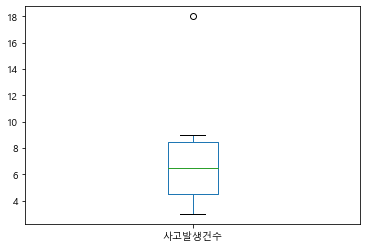

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

real_child_acc_df[['사고발생건수']].plot(kind='box')

<AxesSubplot:>

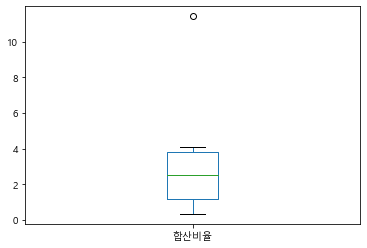

In [14]:
real_child_acc_df[['합산비율']].plot(kind='box')

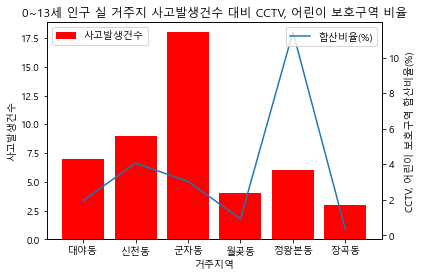

In [15]:
fig, ax1 = plt.subplots()

plot1 = ax1.bar(real_child_acc_df.index, real_child_acc_df['사고발생건수'], label='사고발생건수', color='red')
ax1.set_xlabel('거주지역')
ax1.set_ylabel('사고발생건수')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
plot2 = ax2.plot(real_child_acc_df.index, real_child_acc_df['합산비율'], label='합산비율(%)')
ax2.set_ylabel('CCTV, 어린이 보호구역 합산비율(%)')
ax2.legend(loc='upper right')

plt.title('0~13세 인구 실 거주지 사고발생건수 대비 CCTV, 어린이 보호구역 비율')

plt.show()

In [16]:
import seaborn as sns

corr = real_child_acc_df[real_child_acc_df.columns[14:]].corr()
corr

,인구합계,어린이 보호구역 수,CCTV 수,어린이 보호구역 수 비율,CCTV 수 비율,사고발생건수,합산비율
인구합계,1.000000,-0.499011,-0.415649,-0.560997,-0.602737,-0.316748,-0.598294
어린이 보호구역 수,-0.499011,1.000000,0.811497,0.992478,0.960427,-0.043703,0.977349
CCTV 수,-0.415649,0.811497,1.000000,0.754055,0.902691,0.229185,0.875064
어린이 보호구역 수 비율,-0.560997,0.992478,0.754055,1.000000,0.948866,-0.066863,0.970326
CCTV 수 비율,-0.602737,0.960427,0.902691,0.948866,1.000000,0.114263,0.997041
사고발생건수,-0.316748,-0.043703,0.229185,-0.066863,0.114263,1.000000,0.071239
합산비율,-0.598294,0.977349,0.875064,0.970326,0.997041,0.071239,1.000000


C:\Anaconda\envs\p407\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\envs\p407\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


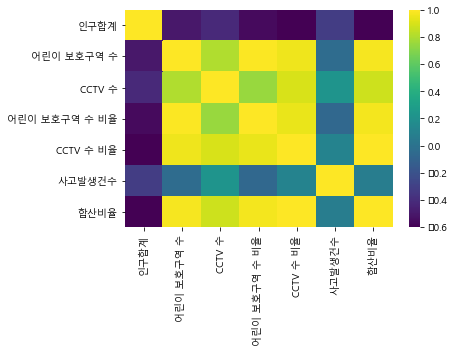

In [17]:
sns.heatmap(corr, cmap='viridis')
plt.show()

### 어린이집, 유치원 및 초등학교 수 데이터 정제

In [18]:
kindergarden

'''
1. 소재지지번주소에서 법정동 이름 추출
2. 법정동->행정동 변환
3. 행정동 기준 보호구역 수 산출
'''
kindergarden_law_location = kindergarden['소재지지번주소'].str.split(' ')
kindergarden['소재지법정동'] = kindergarden_law_location.str.get(2)
kindergarden['소재지행정동'] = kindergarden['소재지법정동'].apply(change_region)
kindergarden

,시군명,시설구분명,공사립구분명,시설명,전화번호,소재지지번주소,소재지도로명주소,소재지우편번호,WGS84위도,WGS84경도,소재지법정동,소재지행정동
0,시흥시,어린이집,국공립,시립정왕2동어린이집,031-432-0660,경기도 시흥시 정왕동 1849-8번지,경기도 시흥시 정왕대로118번길 5 (정왕동),15038.0,37.351106,126.728462,정왕동,정왕본동
1,시흥시,어린이집,국공립,시립정왕보듬이나눔이어린이집,031-431-9555,경기도 시흥시 정왕동 2132번지,경기도 시흥시 경기과기대로 283,15073.0,37.339850,126.735701,정왕동,정왕본동
2,시흥시,어린이집,국공립,시립정왕본동어린이집,031-319-7934,경기도 시흥시 정왕동 2318-6번지,경기도 시흥시 오동마을로6번안길 17 (정왕동),15049.0,37.352234,126.744010,정왕동,정왕본동
3,시흥시,어린이집,국공립,시립정왕어린이집,031-496-0015,경기도 시흥시 정왕동 1866-1번지 시립정왕어린이집,경기도 시흥시 정왕대로53번길 38 시립정왕어린이집,15030.0,37.357610,126.726454,정왕동,정왕본동
4,시흥시,어린이집,국공립,시립종합복지어린이집,031-311-3751,경기도 시흥시 대야동 571-3번지,경기도 시흥시 은행로173번길 14 (대야동),14914.0,37.445518,126.796816,대야동,대야동
...,...,...,...,...,...,...,...,...,...,...,...,...
551,시흥시,유치원,사립,아름유치원,031-312-7772,경기도 시흥시 신천동 213번지,경기도 시흥시 포도원로 96,14953.0,37.434189,126.784350,신천동,신천동
552,시흥시,유치원,사립,윤정유치원,031-317-3700,경기도 시흥시 하상동 368번지 연꽃마을대우.삼호아파트,NaN,14977.0,37.395611,126.812356,하상동,연성동
553,시흥시,유치원,사립,진영유치원,031-435-2222,경기도 시흥시 신천동 826-6번지,경기도 시흥시 포도원로 39,14947.0,37.435989,126.778300,신천동,신천동
554,시흥시,유치원,사립,하하유치원,031-317-8080,경기도 시흥시 하중동 857-5번지,경기도 시흥시 연성로29번길 31,14976.0,37.393329,126.805383,하중동,연성동


In [19]:
elementery

elementery_law_location = elementery['소재지지번주소'].str.split(' ')
elementery['소재지법정동'] = elementery_law_location.str.get(2)
elementery['소재지행정동'] = elementery['소재지법정동'].apply(change_region)
elementery

,시군명,설립구분명,시설명,전화번호,소재지지번주소,소재지도로명주소,소재지우편번호,WGS84위도,WGS84경도,소재지법정동,소재지행정동
0,시흥시,공립,배곧해솔초등학교,031-8063-7802,경기도 시흥시 정왕동 2560번지 배곧해솔초등학교,경기도 시흥시 서울대학로 150-17,15011,37.360246,126.718035,정왕동,정왕본동
1,시흥시,공립,진말초등학교,070-709-7140,경기도 시흥시 장곡동 827번지 진말초등학교,경기도 시흥시 황고개로 567,15002,37.380640,126.787995,장곡동,장곡동
2,시흥시,공립,생금초등학교,070-7016-3004,경기도 시흥시 죽율동 767번지 생금초등학교,경기도 시흥시 죽율로 45-42,15050,37.349919,126.757282,죽율동,정왕본동
3,시흥시,공립,서촌초등학교,070-7014-4094,경기도 시흥시 정왕동 1848-1번지,경기도 시흥시 정왕대로118번길 27,15038,37.349141,126.727275,정왕동,정왕본동
4,시흥시,공립,서해초등학교,031-434-6153,경기도 시흥시 정왕동 1867-2번지 서해초등학교,경기도 시흥시 정왕대로53번길 14,15030,37.355857,126.724835,정왕동,정왕본동
5,시흥시,공립,송운초등학교,070-4355-0603,경기도 시흥시 정왕동 1875-3번지 송운초등학교,경기도 시흥시 옥구천동로 433-25,15028,37.359941,126.729832,정왕동,정왕본동
6,시흥시,공립,시화초등학교,070-5069-0304,경기도 시흥시 정왕동 1418-2번지 시화초등학교,경기도 시흥시 큰솔로7번길 10,15059,37.339085,126.751280,정왕동,정왕본동
7,시흥시,공립,시흥능곡초등학교,070-7096-7291,경기도 시흥시 능곡동 797번지 시흥능곡초등학교,경기도 시흥시 능곡중앙로 22,14995,37.365338,126.812580,능곡동,능곡동
8,시흥시,공립,시흥매화초등학교,070-7097-0105,경기도 시흥시 매화동 445-1번지 시흥매화초등학교,경기도 시흥시 매화1로 62,14940,37.416130,126.808351,매화동,매화동
9,시흥시,공립,시흥월곶초등학교,070-7097-2518,경기도 시흥시 월곶동 1010-5번지 시흥월곶초등학교,경기도 시흥시 월곶해안로 69,14964,37.391583,126.737023,월곶동,월곶동


In [20]:
# 행정동 별 어린이집 및 유치원 수
kindergarden_num = kindergarden.groupby('소재지행정동').size()

# 행정동 별 초등학교 수
elementery_num = elementery.groupby('소재지행정동').size()

# 각 시리즈 & 어린이 인구 수 데이터프레임 합성
all_num_df2 = pd.concat([kindergarden_num, elementery_num], axis=1)

# 열 이름 변경
all_num_df2.rename(columns={0:'어린이집 및 유치원 수', 1:'초등학교 수'}, inplace=True)

# cctv, 어린이보호구역 수 데이터프레임 합성
final_child_school_num = pd.concat([all_num_df2, all_num_df], axis=1)
final_child_school_num

# 열 이름 변경
final_child_school_num.rename(columns={0:'어린이 보호구역 수', 1:'CCTV 수'}, inplace=True)
final_child_school_num

,어린이집 및 유치원 수,초등학교 수,어린이 보호구역 수,CCTV 수
소재지행정동,,,,
군자동,16.0,2.0,10.0,63
능곡동,20.0,2.0,4.0,24
대야동,41.0,3.0,10.0,84
매화동,12.0,2.0,6.0,38
목감동,54.0,4.0,8.0,29
신천동,25.0,4.0,10.0,98
신현동,7.0,1.0,4.0,40
연성동,47.0,3.0,9.0,36
월곶동,21.0,2.0,5.0,14


### 사고다발지역과 비교

In [21]:
real_school_acc_df = pd.concat([final_child_school_num, walk_child_accident_num_df], axis=1)
real_school_acc_df.fillna(0, inplace=True)
real_school_acc_df.rename(columns={'발생건수':'사고발생건수'}, inplace=True)

# 어린이집 및 유치원 수와 초등학교 수 합산
real_school_acc_df['총 학교 수'] = real_school_acc_df['어린이집 및 유치원 수'] + real_school_acc_df['초등학교 수']

# 합계 / 각 열 수 => 측정 비율 레이블 컬럼 각각 하나씩 산출
# 비율 단위는 %
real_school_acc_df['어린이 보호구역 수 비율'] = (real_school_acc_df['어린이 보호구역 수'] / real_school_acc_df['총 학교 수']) * 100
real_school_acc_df['CCTV 수 비율'] = (real_school_acc_df['CCTV 수'] / real_school_acc_df['총 학교 수']) * 100

# cctv, 어린이 보호구역 수 비율 합산 컬럼
real_school_acc_df['합산비율'] = real_school_acc_df['어린이 보호구역 수 비율'] + real_school_acc_df['CCTV 수 비율']
real_school_acc_df

# 사고발생건수 없는 지역 삭제
real_school_acc_df.dropna(inplace=True)
no_acc_school_num = real_school_acc_df[real_school_acc_df['사고발생건수'] == 0].index
real_school_acc_df = real_school_acc_df.drop(no_acc_school_num)

real_school_acc_df
# real_school_acc_df.to_csv('학교 수 가공 데이터.csv', encoding='cp949')

,어린이집 및 유치원 수,초등학교 수,어린이 보호구역 수,CCTV 수,사고발생건수,총 학교 수,어린이 보호구역 수 비율,CCTV 수 비율,합산비율
군자동,16.0,2.0,10.0,63,18.0,18.0,55.555556,350.000000,405.555556
대야동,41.0,3.0,10.0,84,7.0,44.0,22.727273,190.909091,213.636364
신천동,25.0,4.0,10.0,98,9.0,29.0,34.482759,337.931034,372.413793
월곶동,21.0,2.0,5.0,14,4.0,23.0,21.739130,60.869565,82.608696
장곡동,26.0,2.0,5.0,13,3.0,28.0,17.857143,46.428571,64.285714
정왕본동,240.0,15.0,43.0,141,6.0,255.0,16.862745,55.294118,72.156863


In [22]:
real_school_acc_df['사고발생건수'].describe()

count     6.000000
mean      7.833333
std       5.419102
min       3.000000
25%       4.500000
50%       6.500000
75%       8.500000
max      18.000000
Name: 사고발생건수, dtype: float64

In [23]:
real_school_acc_df['합산비율'].describe()

count      6.000000
mean     201.776164
std      155.363817
min       64.285714
25%       74.769821
50%      148.122530
75%      332.719436
max      405.555556
Name: 합산비율, dtype: float64

<AxesSubplot:>

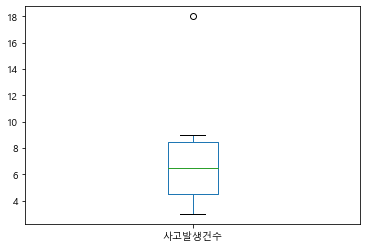

In [24]:
real_school_acc_df[['사고발생건수']].plot(kind='box')

<AxesSubplot:>

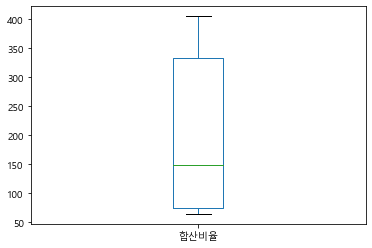

In [25]:
real_school_acc_df[['합산비율']].plot(kind='box')

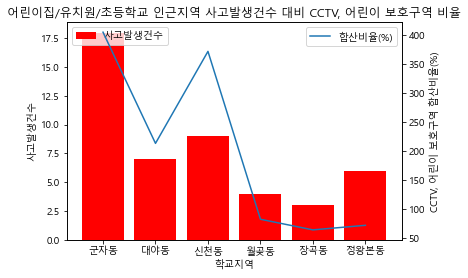

In [26]:
fig, ax1 = plt.subplots()

plot1 = ax1.bar(real_school_acc_df.index, real_school_acc_df['사고발생건수'], label='사고발생건수', color='red')
ax1.set_xlabel('학교지역')
ax1.set_ylabel('사고발생건수')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
plot2 = ax2.plot(real_school_acc_df.index, real_school_acc_df['합산비율'], label='합산비율(%)')
ax2.set_ylabel('CCTV, 어린이 보호구역 합산비율(%)')
ax2.legend(loc='upper right')

plt.title('어린이집/유치원/초등학교 인근지역 사고발생건수 대비 CCTV, 어린이 보호구역 비율')

plt.show()

In [27]:
corr2 = real_school_acc_df[real_school_acc_df.columns[2:]].corr()
corr2

,어린이 보호구역 수,CCTV 수,사고발생건수,총 학교 수,어린이 보호구역 수 비율,CCTV 수 비율,합산비율
어린이 보호구역 수,1.000000,0.811497,-0.043703,0.985567,-0.270540,-0.262077,-0.265871
CCTV 수,0.811497,1.000000,0.229185,0.732775,0.014694,0.247000,0.227688
사고발생건수,-0.043703,0.229185,1.000000,-0.202895,0.961520,0.838645,0.859910
총 학교 수,0.985567,0.732775,-0.202895,1.000000,-0.421357,-0.417485,-0.422613
어린이 보호구역 수 비율,-0.270540,0.014694,0.961520,-0.421357,1.000000,0.868612,0.891029
CCTV 수 비율,-0.262077,0.247000,0.838645,-0.417485,0.868612,1.000000,0.998886
합산비율,-0.265871,0.227688,0.859910,-0.422613,0.891029,0.998886,1.000000


C:\Anaconda\envs\p407\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\envs\p407\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


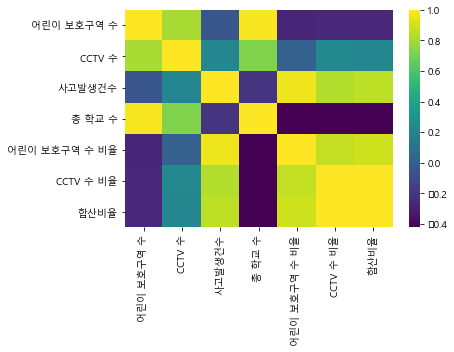

In [28]:
sns.heatmap(corr2, cmap='viridis')
plt.show()